<a href="https://colab.research.google.com/github/reygaferdiansyah/Yolo8_With_Roboflow/blob/main/Skripsi_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Aug 25 14:46:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
WARNING ⚠️ Ultralytics settings reset to defaults. 
This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
You may view and update settings directly in '/root/.config/Ultralytics/settings.yaml'
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 140.0ms
Speed: 0.6ms pre-process, 140.0ms inference, 155.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


/content


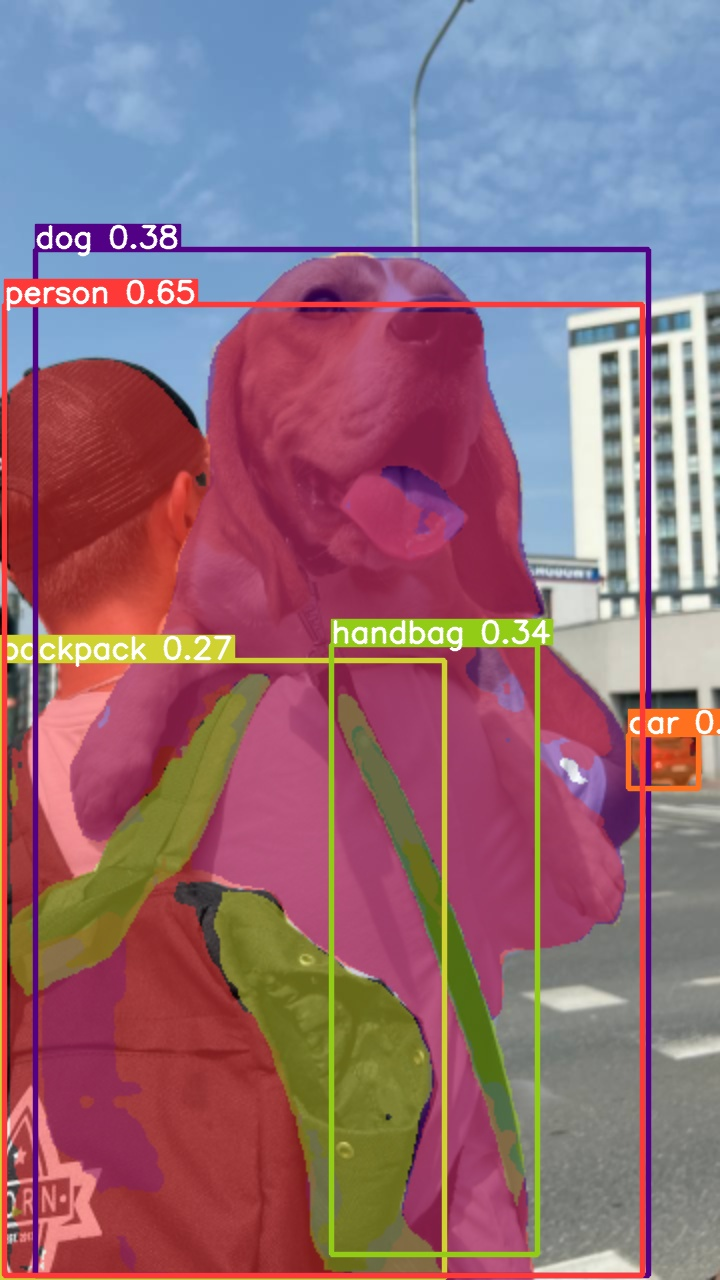

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.masks

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OeMGg7rPtyz3TMN3JWtR")
project = rf.workspace("stikom-cki-mkng8").project("siput")
dataset = project.version(7).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.162, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Siput-7 in yolov8:: 100%|██████████| 11312/11312 [00:03<00:00, 2973.74it/s]


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Siput-7/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml  weights


/content


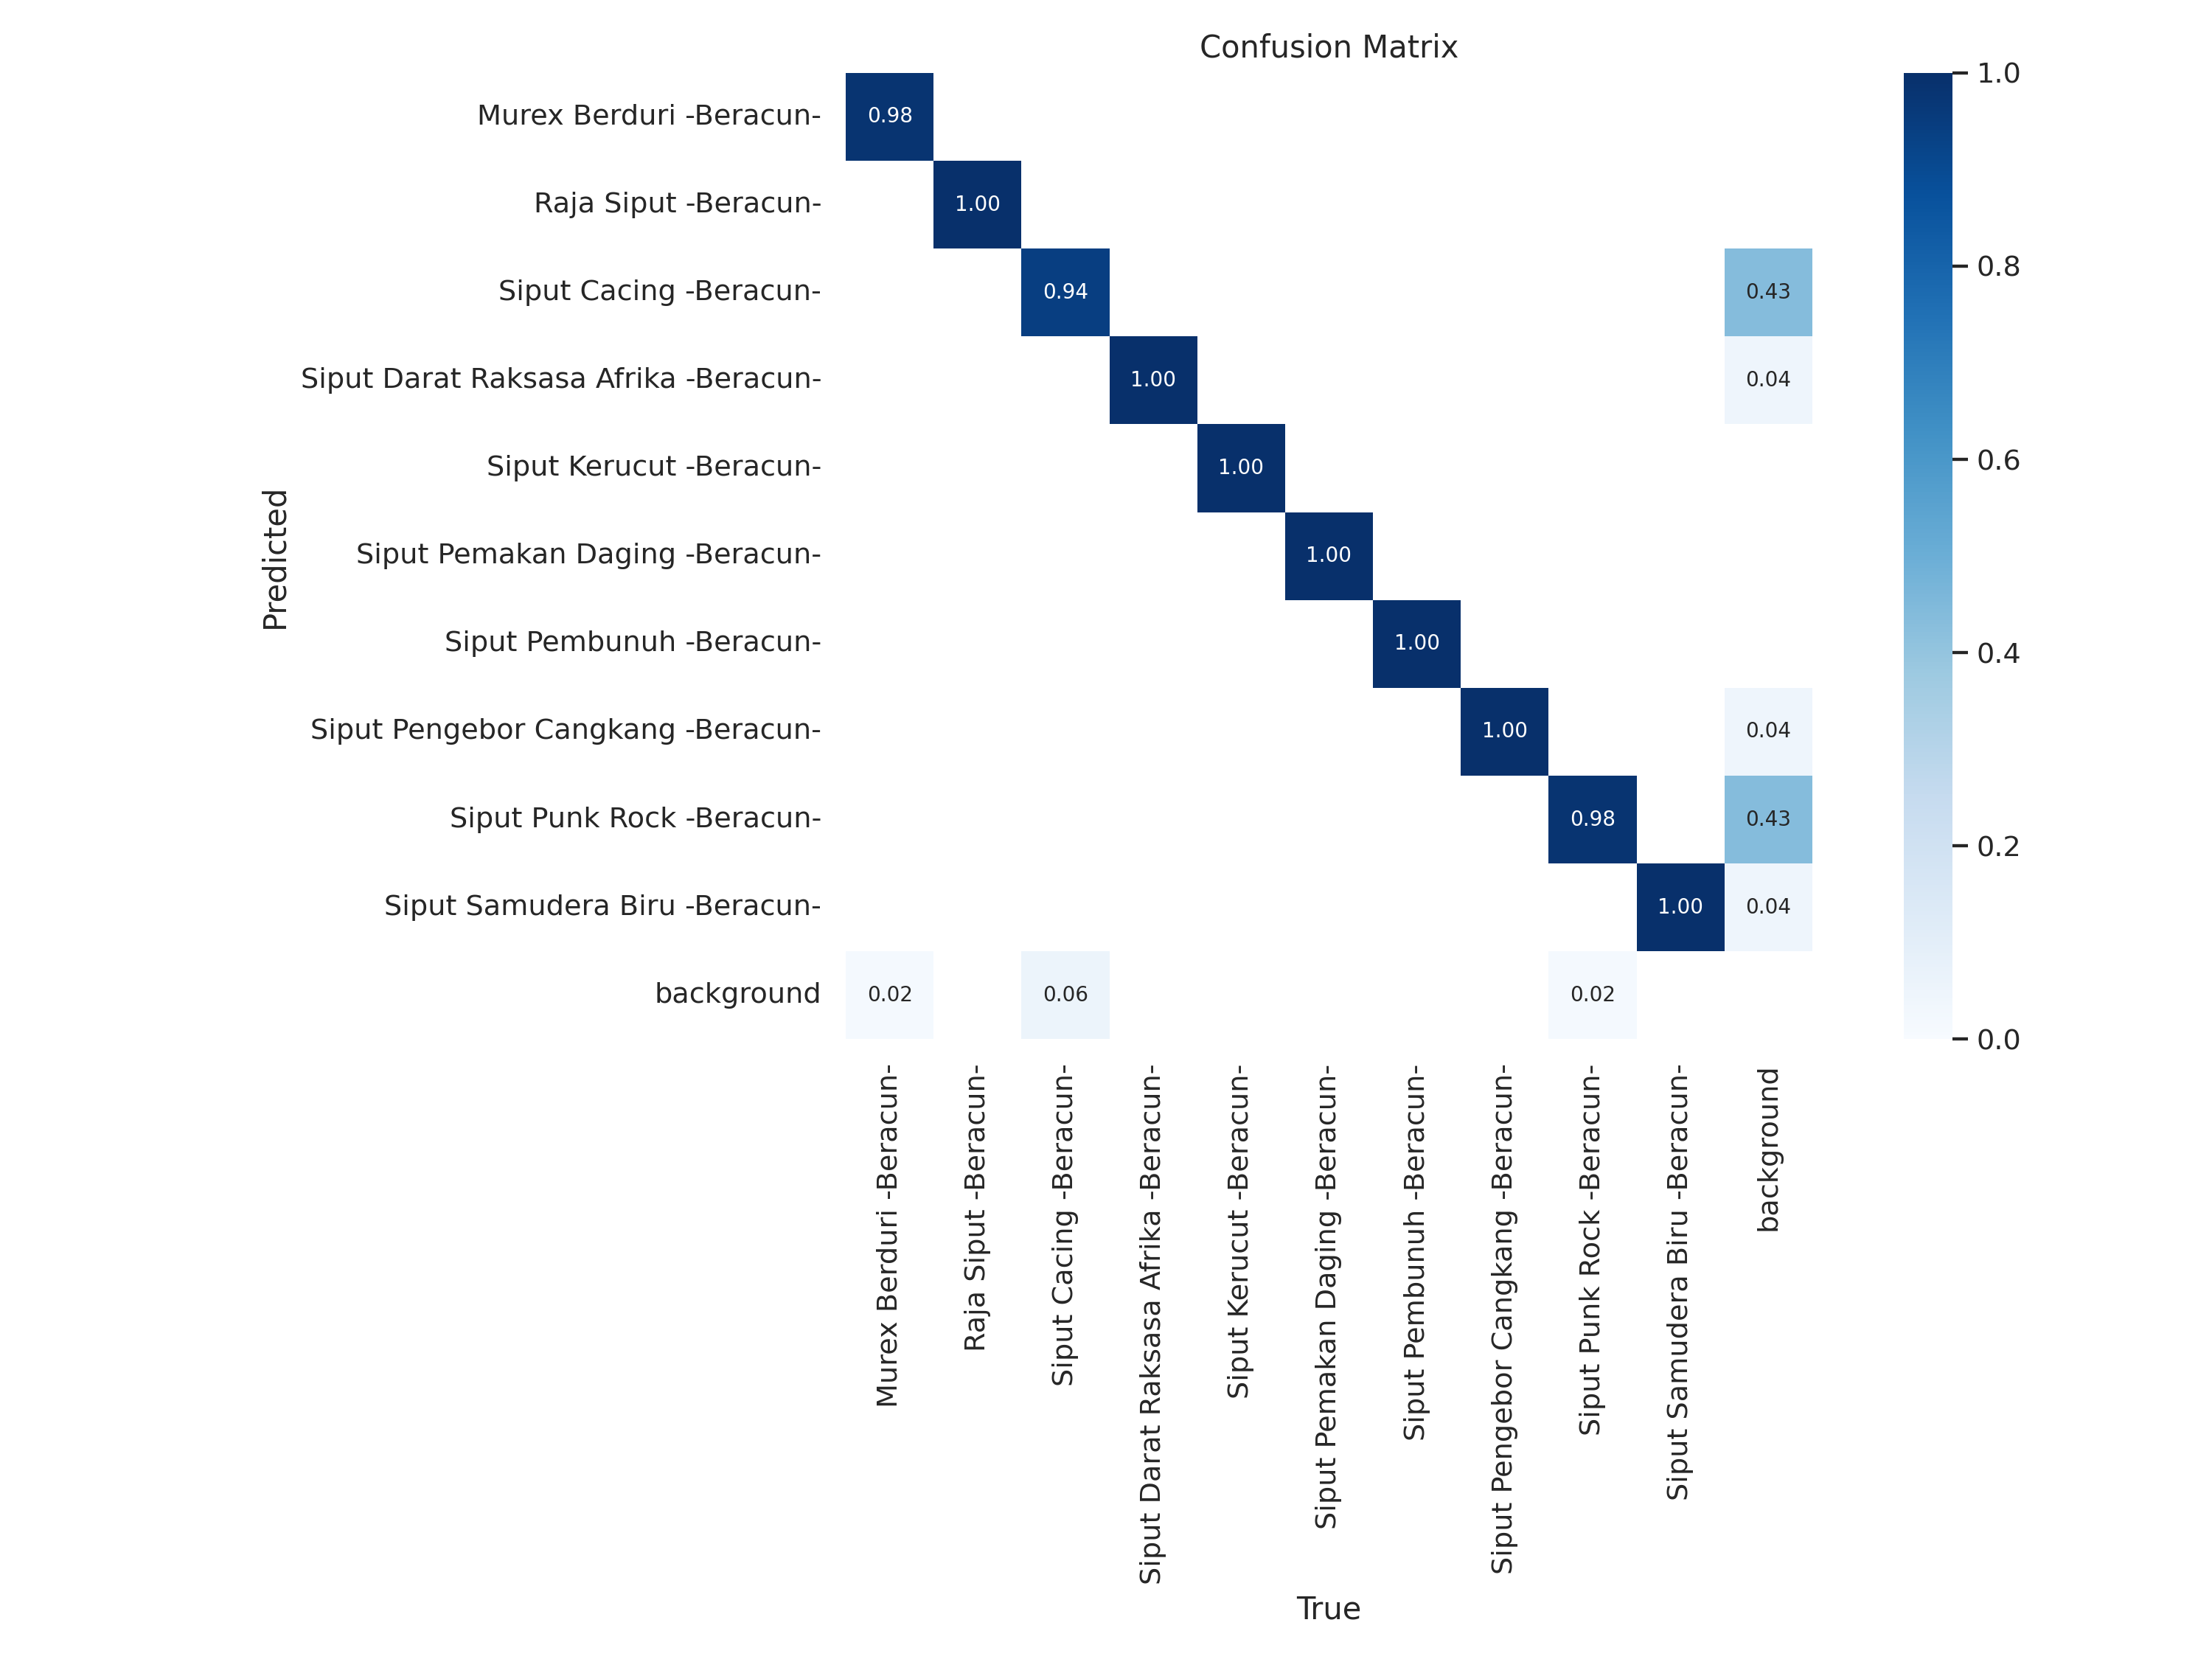

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/confusion_matrix.png', width=600)

/content


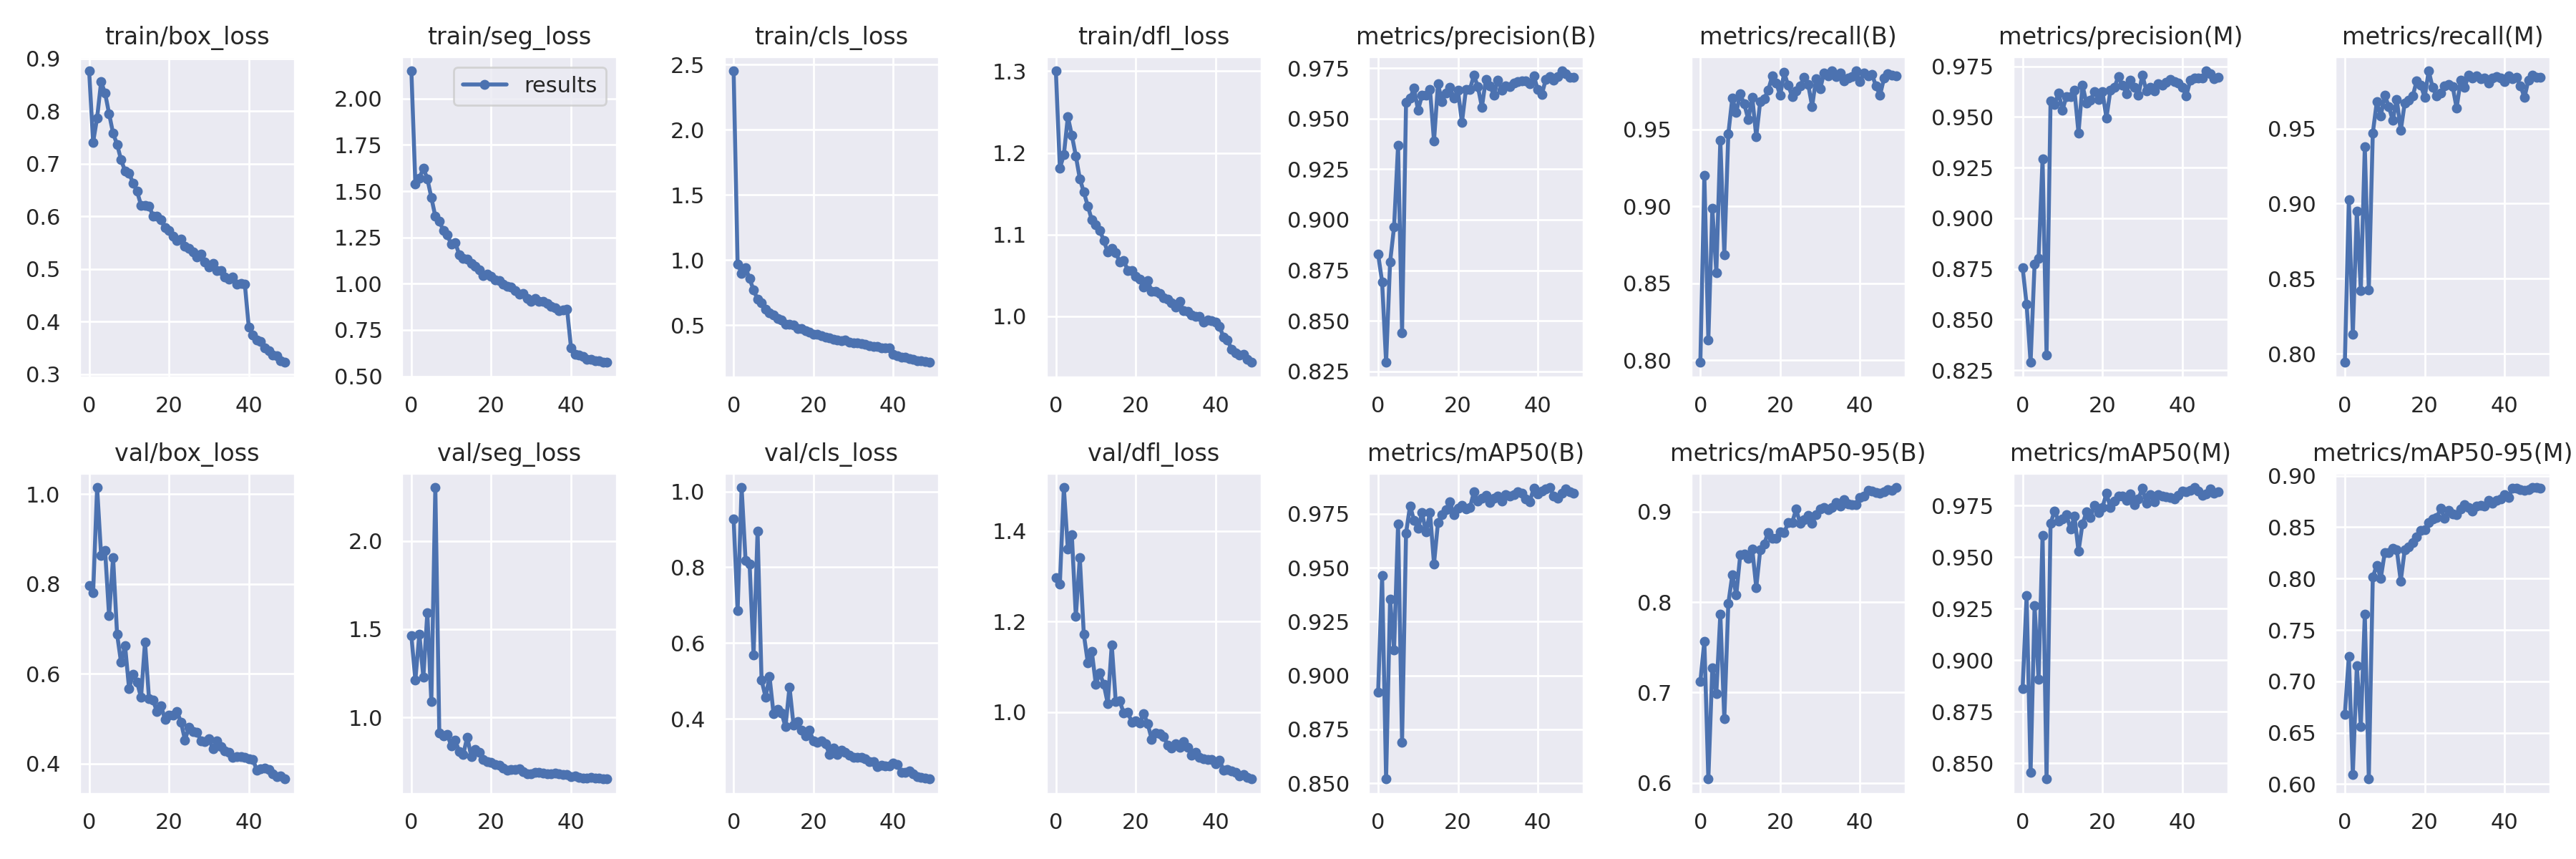

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/results.png', width=600)

/content


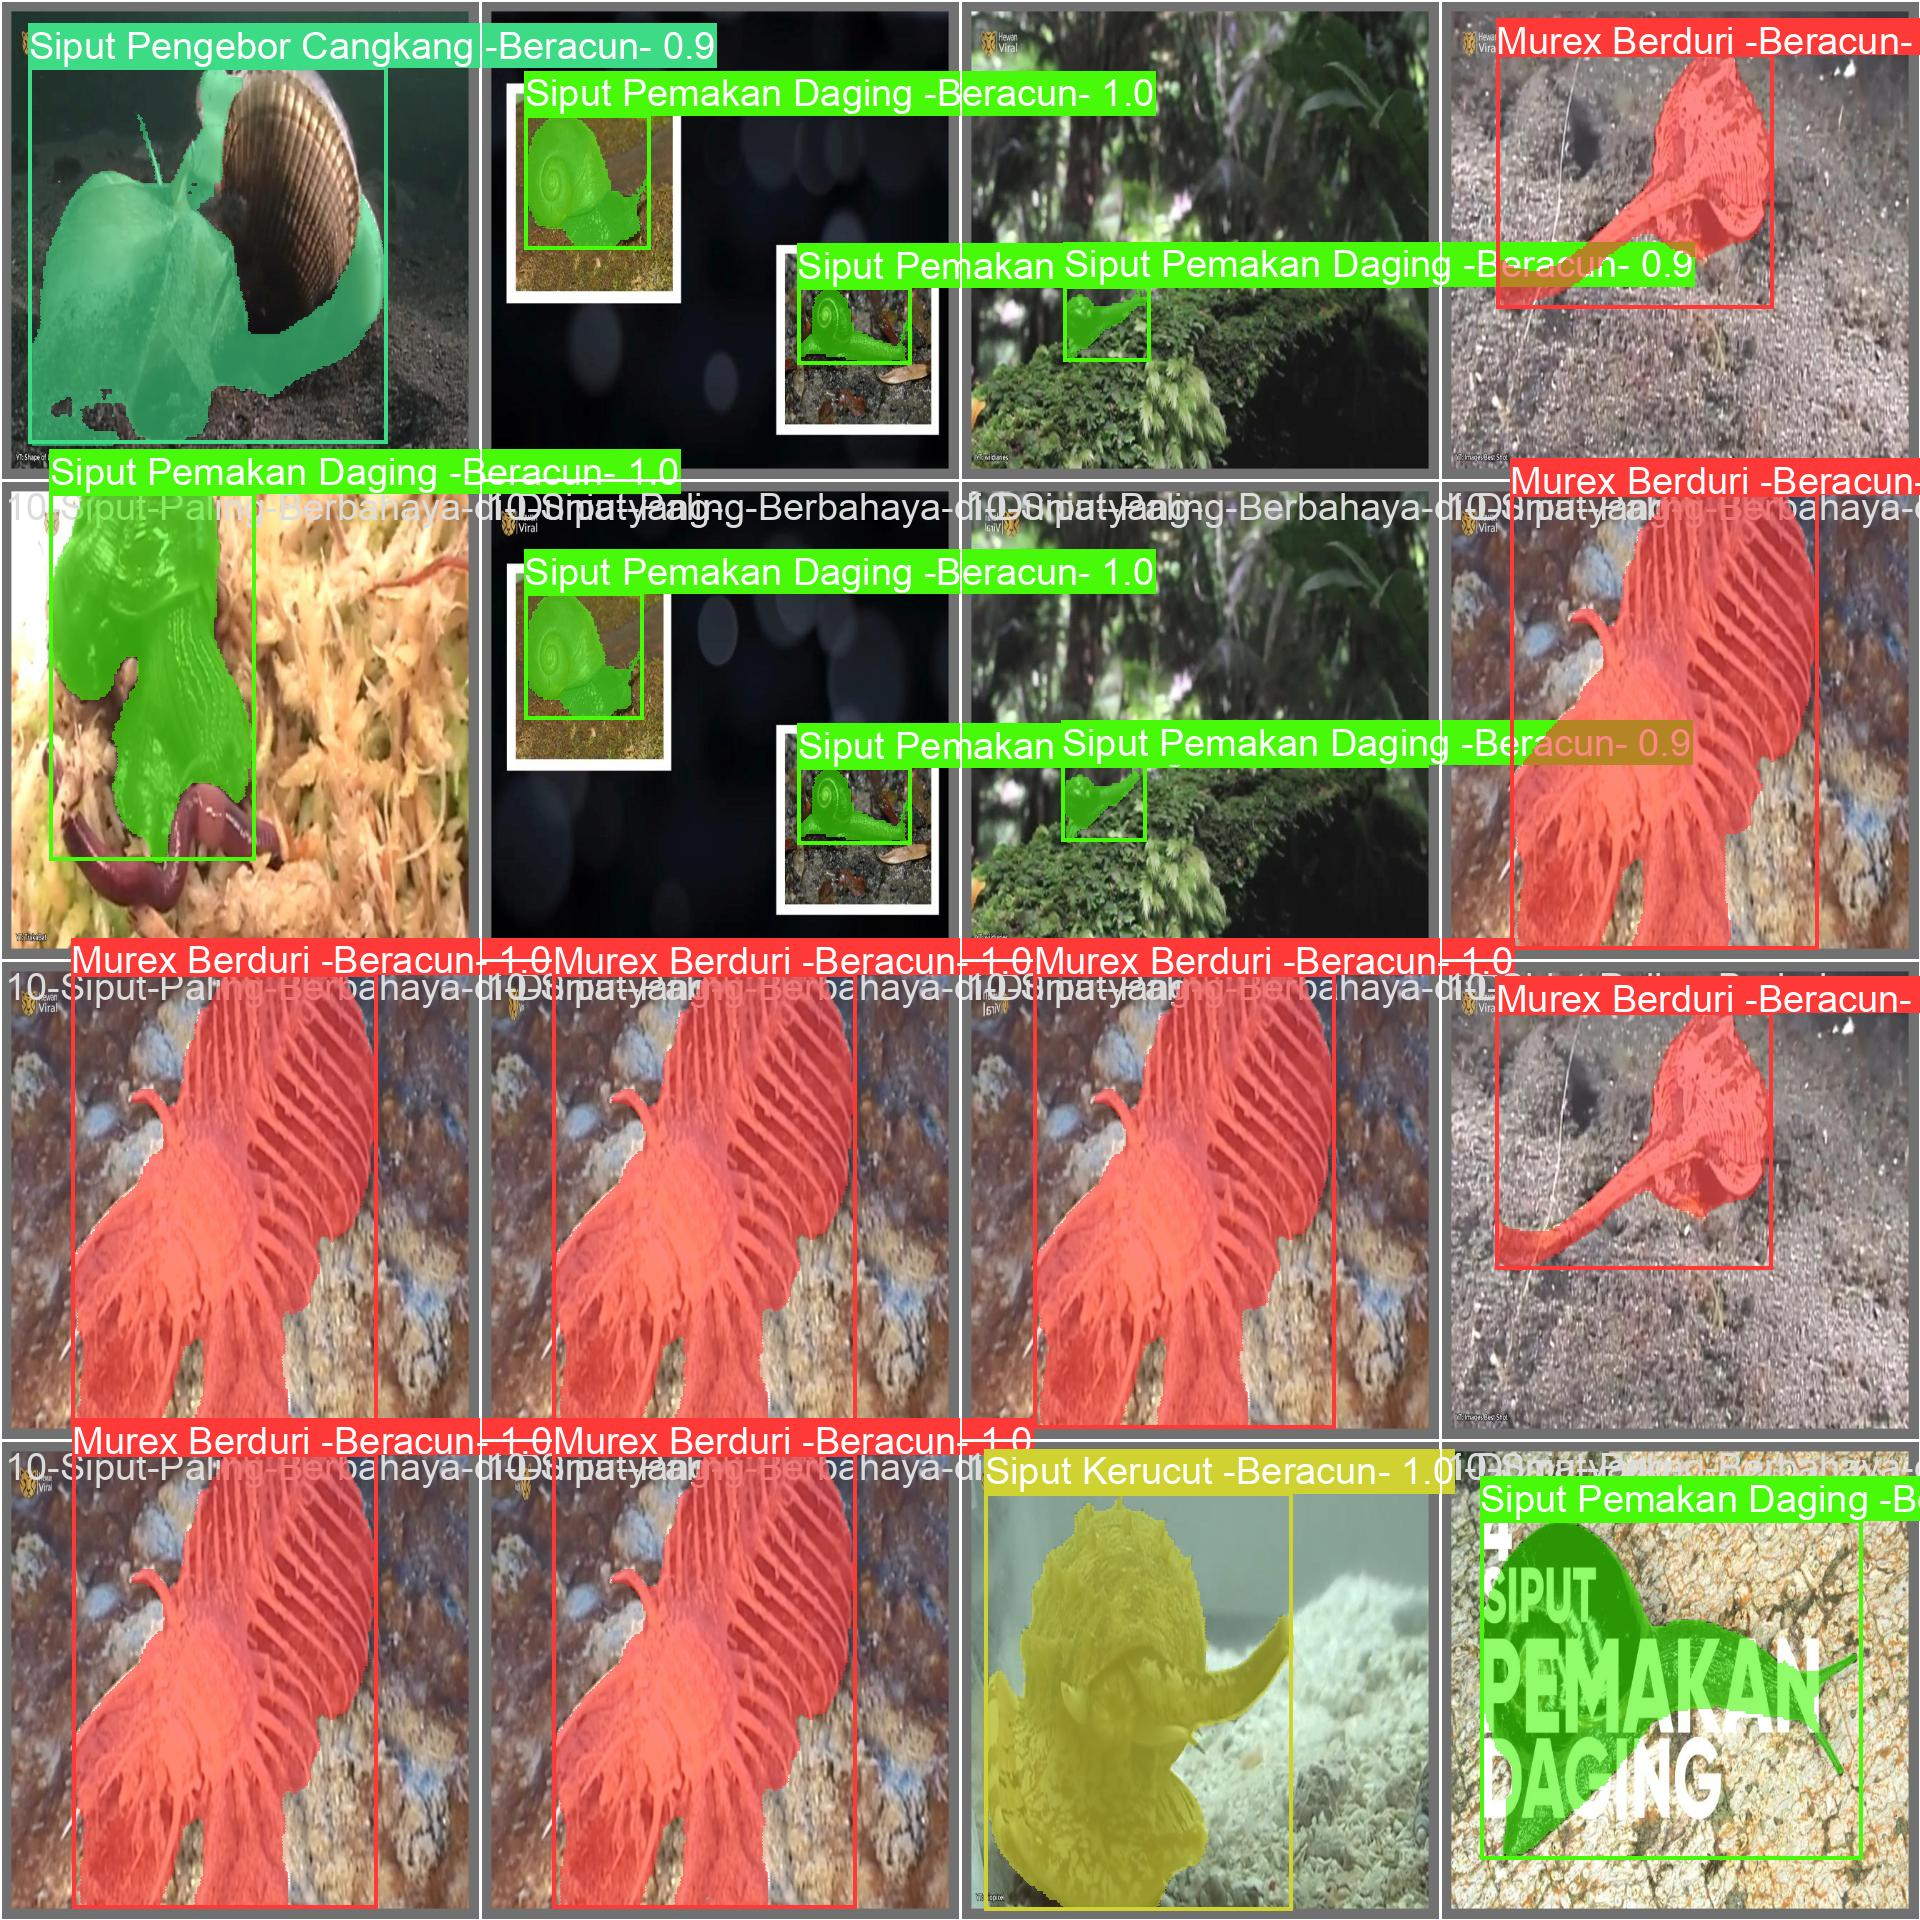

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/Siput-7/valid/labels.cache... 480 images, 16 backgrounds, 0 corrupt: 100% 480/480 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 30/30 [00:15<00:00,  1.93it/s]
                   all        480        609       0.97      0.985      0.984      0.927      0.969      0.984      0.982      0.888
Murex Berduri -Beracun-        480         63      0.977      0.984      0.981      0.957      0.984      0.991      0.983      0.789
  Raja Siput -Beracun-        480         45      0.991          1      0.995      0.962      0.991          1      0.995      0.958
Siput Cacing -Beracun-        480         70      0.888      0.914      0.938      0.707      0.873        0.9      

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs

image 1/240 /content/datasets/Siput-7/test/images/10-Siput-Paling-Berbahaya-di-Dunia-yang-Harus-Kamu-Hindari_mp4-1001_jpg.rf.62bad37c77faf7425e2cc108e5e15678.jpg: 640x640 1 Siput Pengebor Cangkang -Beracun-, 21.0ms
image 2/240 /content/datasets/Siput-7/test/images/10-Siput-Paling-Berbahaya-di-Dunia-yang-Harus-Kamu-Hindari_mp4-1003_jpg.rf.88bf9781120454885afaa21e768636cd.jpg: 640x640 1 Siput Pengebor Cangkang -Beracun-, 21.0ms
image 3/240 /content/datasets/Siput-7/test/images/10-Siput-Paling-Berbahaya-di-Dunia-yang-Harus-Kamu-Hindari_mp4-1017_jpg.rf.f05425e39b63683765f747f8a1836648.jpg: 640x640 2 Siput Pengebor Cangkang -Beracun-s, 21.0ms
image 4/240 /content/datasets/Siput-7/test/images/10-Siput-Paling-Berbahaya-di-Dunia-yang-Harus-Kamu-Hindari_mp4-1023_jpg.rf.0ff97726a039bc6691b6b7c773376819.jpg: 640x640

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.25 source=/content/siput.mp4 save=true

Output streaming akan dipotong hingga 5000 baris terakhir.
video 1/1 (13613/18610) /content/siput.mp4: 384x640 1 Siput Samudera Biru -Beracun-, 9.2ms
video 1/1 (13614/18610) /content/siput.mp4: 384x640 9.2ms
video 1/1 (13615/18610) /content/siput.mp4: 384x640 9.2ms
video 1/1 (13616/18610) /content/siput.mp4: 384x640 9.2ms
video 1/1 (13617/18610) /content/siput.mp4: 384x640 14.7ms
video 1/1 (13618/18610) /content/siput.mp4: 384x640 9.3ms
video 1/1 (13619/18610) /content/siput.mp4: 384x640 9.5ms
video 1/1 (13620/18610) /content/siput.mp4: 384x640 9.4ms
video 1/1 (13621/18610) /content/siput.mp4: 384x640 1 Siput Samudera Biru -Beracun-, 9.5ms
video 1/1 (13622/18610) /content/siput.mp4: 384x640 1 Siput Samudera Biru -Beracun-, 9.2ms
video 1/1 (13623/18610) /content/siput.mp4: 384x640 1 Siput Samudera Biru -Beracun-, 9.4ms
video 1/1 (13624/18610) /content/siput.mp4: 384x640 1 Siput Samudera Biru -Beracun-, 10.1ms
video 1/1 (13625/18610) /content/siput.mp4: 384x640 1 Siput Samudera Biru -Ber